In [55]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data.data.shape

(1797, 64)

In [6]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
data.target.shape

(1797,)

In [13]:
np.unique(data["target"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
data.images.shape

(1797, 8, 8)

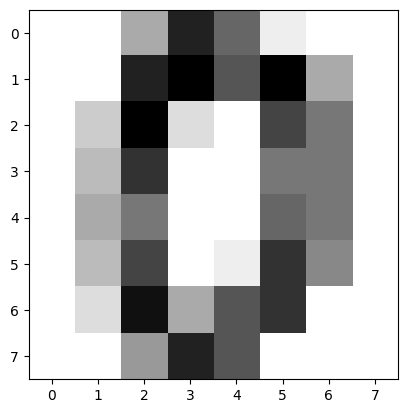

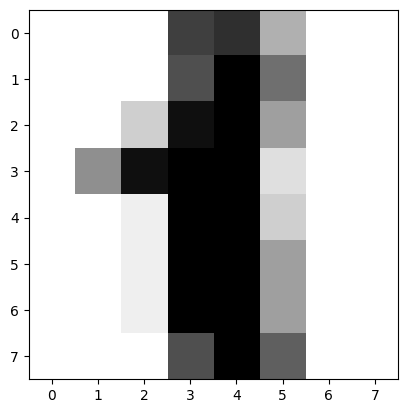

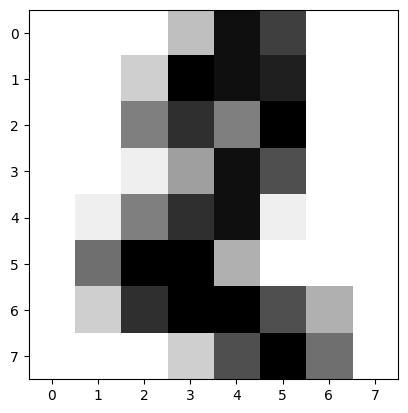

In [18]:
for image in data.images[:3]:
  plt.imshow(image, cmap=plt.cm.binary)
  plt.show()

In [20]:
np.max(data.images)

16.0

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [32]:
classifier = KNeighborsClassifier(algorithm="brute")

In [33]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [34]:
y_pred = classifier.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.96      1.00      0.98        81
           2       0.99      0.98      0.98        90
           3       0.98      0.99      0.98        88
           4       0.99      0.98      0.98       100
           5       0.98      0.97      0.98       106
           6       1.00      1.00      1.00        91
           7       0.94      1.00      0.97        78
           8       0.99      0.93      0.96        86
           9       0.98      0.97      0.97        88

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [43]:
classifier = KNeighborsClassifier(n_neighbors=500, algorithm="brute")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        91
           1       0.48      0.44      0.46        81
           2       0.95      0.20      0.33        90
           3       0.34      0.92      0.50        88
           4       1.00      0.05      0.10       100
           5       1.00      0.08      0.14       106
           6       0.43      0.92      0.59        91
           7       0.47      0.96      0.63        78
           8       0.68      0.45      0.55        86
           9       0.46      0.24      0.31        88

    accuracy                           0.49       899
   macro avg       0.66      0.51      0.44       899
weighted avg       0.67      0.49      0.43       899



In [46]:
confusion = confusion_matrix(y_test, y_pred)

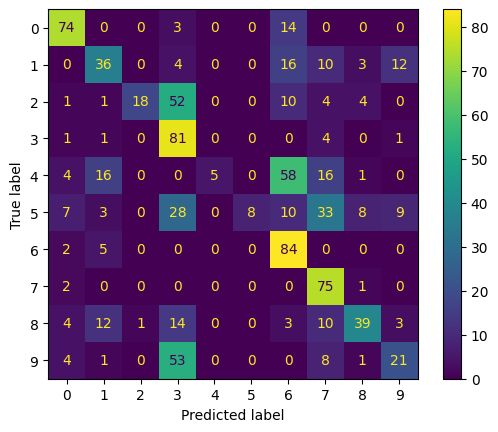

In [48]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

plt.show()

In [49]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

In [52]:
np.mean([report_dict[str(label)]["f1-score"] for label in range(10)])

0.4384450088892854

In [54]:
nom = np.sum([report_dict[str(label)]["f1-score"] * report_dict[str(label)]["support"]  for label in range(10)])
denom = np.sum([report_dict[str(label)]["support"] for label in range(10)])

nom / denom

0.4267366092892511

In [56]:
param_grid = {
    "n_neighbors": [1, 2, 5, 10, 25, 100],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 5, 10]
}

knn = KNeighborsClassifier(algorithm="brute")
cv = GridSearchCV(knn, param_grid)

cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'n_neighbors': [1, 2, 5, 10, 25, 100],
                         'p': [1, 2, 3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [57]:
cv.best_params_

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [58]:
cv.best_score_

0.9832774674115455

In [59]:
classifier = KNeighborsClassifier(n_neighbors=1, algorithm="brute", weights="uniform")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.95      1.00      0.98        81
           2       1.00      0.99      0.99        90
           3       0.96      0.99      0.97        88
           4       0.99      1.00      1.00       100
           5       1.00      0.98      0.99       106
           6       1.00      1.00      1.00        91
           7       0.99      1.00      0.99        78
           8       1.00      0.93      0.96        86
           9       0.97      0.97      0.97        88

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



In [60]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 91},
 '1': {'precision': 0.9529411764705882,
  'recall': 1.0,
  'f1-score': 0.9759036144578312,
  'support': 81},
 '2': {'precision': 1.0,
  'recall': 0.9888888888888889,
  'f1-score': 0.9944134078212291,
  'support': 90},
 '3': {'precision': 0.9560439560439561,
  'recall': 0.9886363636363636,
  'f1-score': 0.9720670391061453,
  'support': 88},
 '4': {'precision': 0.9900990099009901,
  'recall': 1.0,
  'f1-score': 0.9950248756218906,
  'support': 100},
 '5': {'precision': 1.0,
  'recall': 0.9811320754716981,
  'f1-score': 0.9904761904761905,
  'support': 106},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 91},
 '7': {'precision': 0.9873417721518988,
  'recall': 1.0,
  'f1-score': 0.9936305732484078,
  'support': 78},
 '8': {'precision': 1.0,
  'recall': 0.9302325581395349,
  'f1-score': 0.963855421686747,
  'support': 86},
 '9': {'precision': 0.9659090909090909,
  'recall': 0.9659090909090909,
  '